In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataframe = pd.read_excel('/content/drive/MyDrive/Estagio/Projetos/Topic_modeling_ inadimplencia/Inadimplencia_news.xlsx')


In [5]:
dataframe

,data_index,Title_Description
0,03/01/2021,Instituição de ensino não pode impedir TCC por...
1,04/01/2021,Número de brasileiros com dívidas cresce no fi...
2,04/01/2021,"Crédito aumenta, mas fica mais para o consumid..."
3,05/01/2021,"Com auxílio emergencial, inadimplência segue e..."
4,05/01/2021,"Com auxílio emergencial, inadimplência segue e..."
...,...,...
1183,09/11/2023,Paraná tem 38 mil inadimplentes do FIES: De ac...
1184,09/11/2023,Bahia: Inadimplência cresce em outubro mas méd...
1185,09/11/2023,Ibovespa avança puxado por Vale; Bradesco recu...
1186,09/11/2023,Bradesco: Analistas demonstram preocupação com...


In [4]:

dataframe.set_index('data_index', inplace=True)
# Exibindo o DataFrame resultante
dataframe


,Title_Description
data_index,
03/01/2021,Instituição de ensino não pode impedir TCC por...
04/01/2021,Número de brasileiros com dívidas cresce no fi...
04/01/2021,"Crédito aumenta, mas fica mais para o consumid..."
05/01/2021,"Com auxílio emergencial, inadimplência segue e..."
05/01/2021,"Com auxílio emergencial, inadimplência segue e..."
...,...
09/11/2023,Paraná tem 38 mil inadimplentes do FIES: De ac...
09/11/2023,Bahia: Inadimplência cresce em outubro mas méd...
09/11/2023,Ibovespa avança puxado por Vale; Bradesco recu...


In [5]:
df_filtrado_1 = dataframe[:'22/04/2021']
df_filtrado_2 = dataframe['22/04/2021':'02/01/2022']
df_filtrado_3 = dataframe['02/01/2022':'07/02/2022']
df_filtrado_4 = dataframe['07/02/2022':'29/03/2022']
df_filtrado_5 = dataframe['29/03/2022':'09/05/2022']
df_filtrado_6 = dataframe['09/05/2022':'18/03/2023']
df_filtrado_7 = dataframe['18/03/2023':'21/04/2023']
df_filtrado_8 = dataframe['21/04/2023':'21/07/2023']
df_filtrado_9 = dataframe['22/07/2023':'15/09/2023']
df_filtrado_10 = dataframe['15/09/2023':'10/10/2023']
df_filtrado_11 = dataframe['10/10/2023':]

#Limpando os Dados



In [122]:
dataframe = df_filtrado_11
#pd.concat([df_filtrado_7, df_filtrado_8])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
# Load the regular expression library
import re

# Remove punctuation
dataframe['Title_Description'] = \
dataframe['Title_Description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
dataframe['Title_Description'] = \
dataframe['Title_Description'].map(lambda x: x.lower())

# Print out the first rows of papers
dataframe['Title_Description'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence '\.'
<>:6: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-123-0be286c33735>:6: DeprecationWarning: invalid escape sequence '\.'
  dataframe['Title_Description'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-123-0be286c33735>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Title_Description'] = \
<ipython-input-1

data_index
10/10/2023    segunda fase do desenrola brasil começa em out...
10/10/2023    desenrola: saiba quais dívidas podem ser reneg...
10/10/2023    em dois meses bancos renegociam r$ 13 bilhões ...
10/10/2023    comissão do senado aprova pl do desenrola; tex...
10/10/2023    banco central corta a selic pela 2ª vez seguid...
Name: Title_Description, dtype: object

In [12]:
#pip install gensim

#Remove Stopwords


In [124]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')
stop_words.extend(['brasil','Brasil','brazil','cnn','contato','network', 'de', 'para', 'com', 'por', 'que','até','nao','ano','deve','ate','sao','paulo','leia','news'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = dataframe.Title_Description.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['segunda', 'fase', 'desenrola', 'comeca', 'outubro', 'band', 'fm', 'curitiba', 'parana', 'esportes', 'ultimas', 'noticias', 'inadimplencias', 'objetivo', 'empresas', 'possam', 'oferecer', 'descontos']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


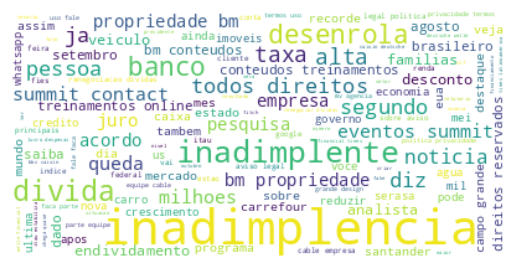

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join([','.join(doc) for doc in data_words])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Lemmatization


In [ ]:
!python -m spacy download pt_core_news_sm

In [12]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [126]:
import pandas as pd

# Create an empty list to store the lemma data
lemma_data = []

for doc in data_words:
    doc2 = nlp(' '.join(doc))
    lemmas = [token.lemma_ for token in doc2 if token.pos_ == 'NOUN']
    lemma_data.append(lemmas)

# Create a DataFrame from the list of dictionaries
Lema = pd.DataFrame(lemma_data)

# Print the 'spacy_lemma' column
print(Lema)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                0         1              2              3              4   \
0             fase    comeca  inadimplencia        empresa       desconto   
1              fim    pessoa  inadimplencia          cable        empresa   
2              mês     banco         google     informacao           None   
3         comissao     texto          aviso            uso          parte   
4            selic       vez           taxa  inadimplencia        despesa   
..             ...       ...            ...            ...            ...   
239   inadimplente       fie       ministro         camilo        devedor   
240  inadimplencia   outubro          media  inadimplencia        outubro   
241       ibovespa  bradesco  inadimplencia            dia         resume   
242       bradesco  analista    preocupacao          custo  inadimplencia   
243           lren       apo  rentabilidade  inadimplencia        destaca   

            5          6      7         8         9     10    11    12  
0 

In [ ]:
#lemma_data = data_words # sem lemmatização

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


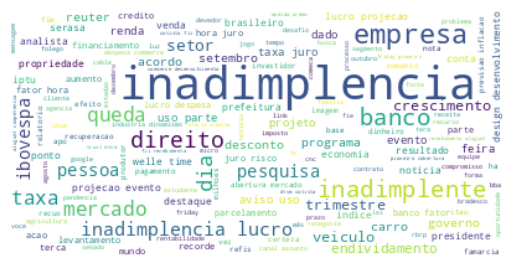

In [128]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join([','.join(doc) for doc in lemma_data])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=5, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Topics


In [129]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess


# Create Dictionary
id2word = corpora.Dictionary(lemma_data)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (3, 1), (75, 1), (444, 1), (481, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.064*"inadimplencia" + 0.030*"mercado" + 0.027*"fitch" + 0.023*"pesquisa" '
  '+ 0.018*"endividamento" + 0.018*"previsao" + 0.018*"friday" + '
  '0.018*"agencia" + 0.018*"foto" + 0.018*"inflacao"'),
 (1,
  '0.050*"inadimplencia" + 0.030*"setembro" + 0.024*"desenrola" + 0.024*"link" '
  '+ 0.024*"governo" + 0.024*"agencia" + 0.018*"milhoes" + '
  '0.018*"desenvolvimento" + 0.018*"campo" + 0.018*"design"'),
 (2,
  '0.086*"inadimplencia" + 0.035*"acordo" + 0.025*"lucro" + 0.018*"mercado" + '
  '0.018*"refis" + 0.014*"inadimplente" + 0.014*"google" + 0.014*"milhoes" + '
  '0.014*"queda" + 0.014*"serasa"'),
 (3,
  '0.064*"inadimplencia" + 0.022*"credito" + 0.022*"pesquisa" + '
  '0.015*"milhoes" + 0.015*"banco" + 0.015*"divida" + 0.015*"monitor" + '
  '0.015*"ponto" + 0.015*"ha" + 0.015*"real"'),
 (4,
  '0.058*"inadimplencia" + 0.035*"credito" + 0.029*"parte" + 0.029*"cable" + '
  '0.023*"equipe" + 0.023*"lucro" + 0.023*"uso" + 0.023*"aviso" + '
  '0.018*"presidente" + 0.018*"tri"'

In [ ]:
#lda_model.print_topics()

In [ ]:
pip install pyLDAvis

In [131]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os


numero = 11

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Estudos/Pesquisa - Diversificação de Ações/Long - Short/Algoritmos/News_Code/Arquivos/varejo_topic_modeling_'+str(numero))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Estudos/Pesquisa - Diversificação de Ações/Long - Short/Algoritmos/News_Code/Arquivos/varejo_topic_modeling_'+ str(numero) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.032902 -0.097256       1        1  15.621176
0      0.115925  0.125177       2        1  11.754754
9     -0.041090 -0.114758       3        1  11.035922
8      0.064378 -0.043579       4        1  10.176708
7     -0.153533  0.052521       5        1   9.913127
2      0.100918  0.032413       6        1   9.143644
5     -0.053630 -0.009136       7        1   9.040836
1     -0.074039  0.056342       8        1   8.293845
4      0.037899 -0.070945       9        1   7.766039
3     -0.029732  0.069220      10        1   7.253949, topic_info=          Term       Freq      Total Category  logprob  loglift
481  desenrola  22.000000  22.000000  Default  30.0000  30.0000
63     milhoes  25.000000  25.000000  Default  29.0000  29.0000
9        banco  17.000000  17.000000  Default  28.0000  28.0000
92      acordo  10.000000  10.000000  Default  27.0000  27.0000
15       parte  10.000000  10.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
16       texto   0.912836   3.062621  Topic10  -4.8627   1.4132
68       moeda   0.912836   3.218481  Topic10  -4.8627   1.3635
44    dinheiro   0.912833   4.023257  Topic10  -4.8627   1.1403
372      baixa   0.912832   3.718994  Topic10  -4.8627   1.2190
293   bradesco   0.912828   4.749848  Topic10  -4.8627   0.9743

[537 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
234       1  0.532282  abertura
234       6  0.266141  abertura
234       9  0.266141  abertura
133       8  0.641798    aborto
134       2  0.181782      acao
...     ...       ...       ...
106       8  0.149965      voce
52        1  0.185817     welle
52        3  0.185817     welle
52        5  0.371634     welle
52       10  0.185817     welle

[755 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 10, 9, 8, 3, 6, 2, 5, 4])